<a href="https://colab.research.google.com/github/PRIYANSHUJAINJECRC/Titanic_dataset_practice/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Titanic-Dataset.csv")
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()


Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(['Cabin'],axis=1,inplace=True)
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


29.36158249158249
0.443426254518323
low


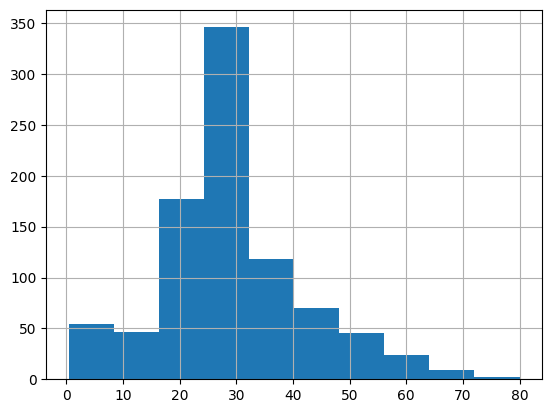

In [31]:
df['Age'].hist()
st=df['Age'].std()
m=df['Age'].mean()
cv=st/m
print(m)
print(cv)
if(st/m<10):
  print('low')
elif(st/m<20):
  print('medium')
else:
  print('high')

In [36]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
num_col=['Age','Fare', 'SibSp', 'Parch']
cat_col=['Sex','Embarked']
num_transformer=StandardScaler()
cat_transformer=OneHotEncoder(drop='first',handle_unknown='ignore')
preprocessor=ColumnTransformer(transformers=[('num',num_transformer,num_col),
                                             ('cat',cat_transformer,cat_col)])
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression())
])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
print(y_pred[:10])
train_accuracy=accuracy_score(y_train,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred)
print(train_accuracy)
print(test_accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(y_pred_train[:10])

[0 0 0 1 0 1 0 0 0 0]
0.6839887640449438
0.6815642458100558
[[99  6]
 [51 23]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       105
           1       0.79      0.31      0.45        74

    accuracy                           0.68       179
   macro avg       0.73      0.63      0.61       179
weighted avg       0.72      0.68      0.64       179

[0 0 0 0 0 1 0 0 0 0]


In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print(scores)
print(scores.mean())


[0.63128492 0.74719101 0.6741573  0.70224719 0.69662921]
0.6903019270604481
